In [0]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [0]:
(X, Y), (Xtest, Ytest) = mnist.load_data()
img_width, img_height = X[0].shape
X = X/255
Xtest = Xtest/255

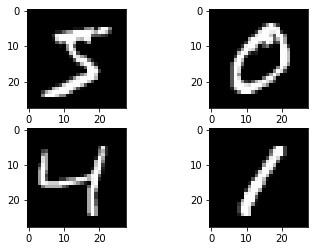

In [0]:
plt.subplot(221)
plt.imshow(X[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

**Dimensionality Reduction : A Feature Engineering Method**

*Explores techniques for translating high-dimensional data into lower dimensional data.* 

Talking about MNIST dataset
 MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits as above shown.

Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is. For example, we might think of  as something like:

![alt text](https://drive.google.com/uc?id=1AT8uKWZgOTXqyOTHseeV_NaWjVCsuUmb)

Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28∗28=784 dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.

Dimensionality reduction can be done in two different ways:

1) By only keeping the most relevant variables from the original dataset (this technique is called feature selection)

2)By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)

In [0]:
# 1 Missing Value Ratio If a feature have more null values than threshold then 
# that can removed , In this case this techniwue wont work.

In [0]:
# 2. Low variance Filter :we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset
#  as low var does not affect the target variable much

In [0]:
# 3 Highly correlated filter : two var are more correlated to each other , then one of the variable is droped

Principal Component Analysis (PCA)
PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components. 

A principal component is a linear combination of the original variables

Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset

Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component

Third principal component tries to explain the variance which is not explained by the first two principal components and so on

2D Visualisation Using PCA

The data returned from mnist.load_data() is a 3-dimensional tensor, which we reshape to a matrix. Each row corresponds to one handwritten digit, and each column to a position in the image.



In [0]:
X = X.reshape(X.shape[0], img_width*img_height)

In [0]:
X -= X.mean(axis=0)

In [0]:
# try to apply PCA using the TruncatedSVD implementation in scikit-learn.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_reduced, Y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# building with 10,000 points we got low results.

LR: 0.443100 (0.009025)
LDA: 0.435367 (0.007580)
KNN: 0.413883 (0.007351)
CART: 0.376367 (0.007787)
NB: 0.439133 (0.008363)
SVM: 0.468167 (0.007641)


In [0]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X_ICA_reduced = ICA.fit_transform(X)

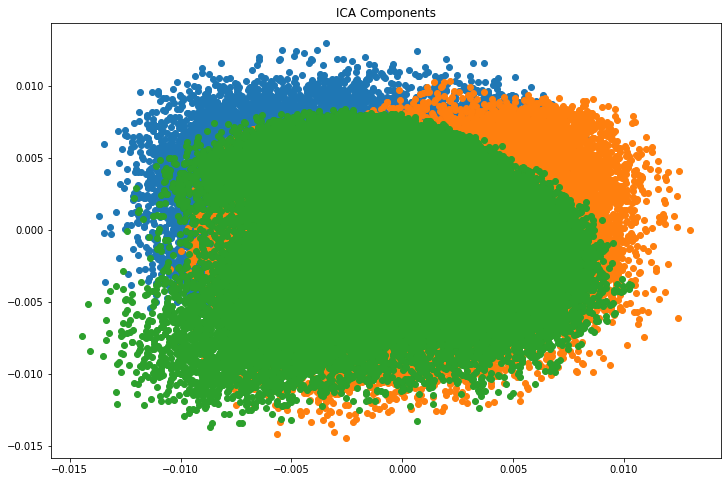

In [0]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X_ICA_reduced[:,0], X_ICA_reduced[:,1])
plt.scatter(X_ICA_reduced[:,1], X_ICA_reduced[:,2])
plt.scatter(X_ICA_reduced[:,2], X_ICA_reduced[:,0])

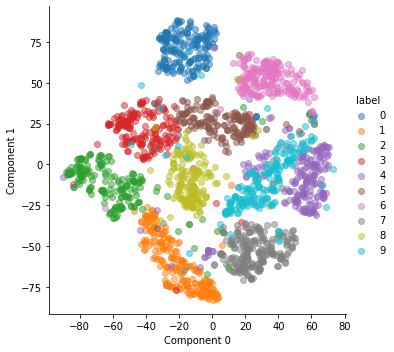

In [0]:
from sklearn.manifold import TSNE

N = 10000
import numpy as np
np.random.seed(0)
tsne = TSNE()
X_tsne = tsne.fit_transform(X_reduced[:N])

nice_scatterplot(X_tsne, Y, 0, 1, N=2000)

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC    
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_tsne, Y[0:10000], cv=kfold, scoring='accuracy')
  results.append(cv_results)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.910300 (0.011472)
LDA: 0.883900 (0.007981)
KNN: 0.950900 (0.008372)
CART: 0.933500 (0.009255)
NB: 0.892700 (0.007253)
SVM: 0.923500 (0.007379)
